In [1]:
import pandas as pd

# Simple statistics regarding extraneous regions in HGTDB

In [ ]:
import matplotlib.pyplot as plt

In [136]:
table_of_extraneous_regions = pd.read_csv('list_of_extraneous_regions.csv', sep=';')

<Axes: xlabel='file'>

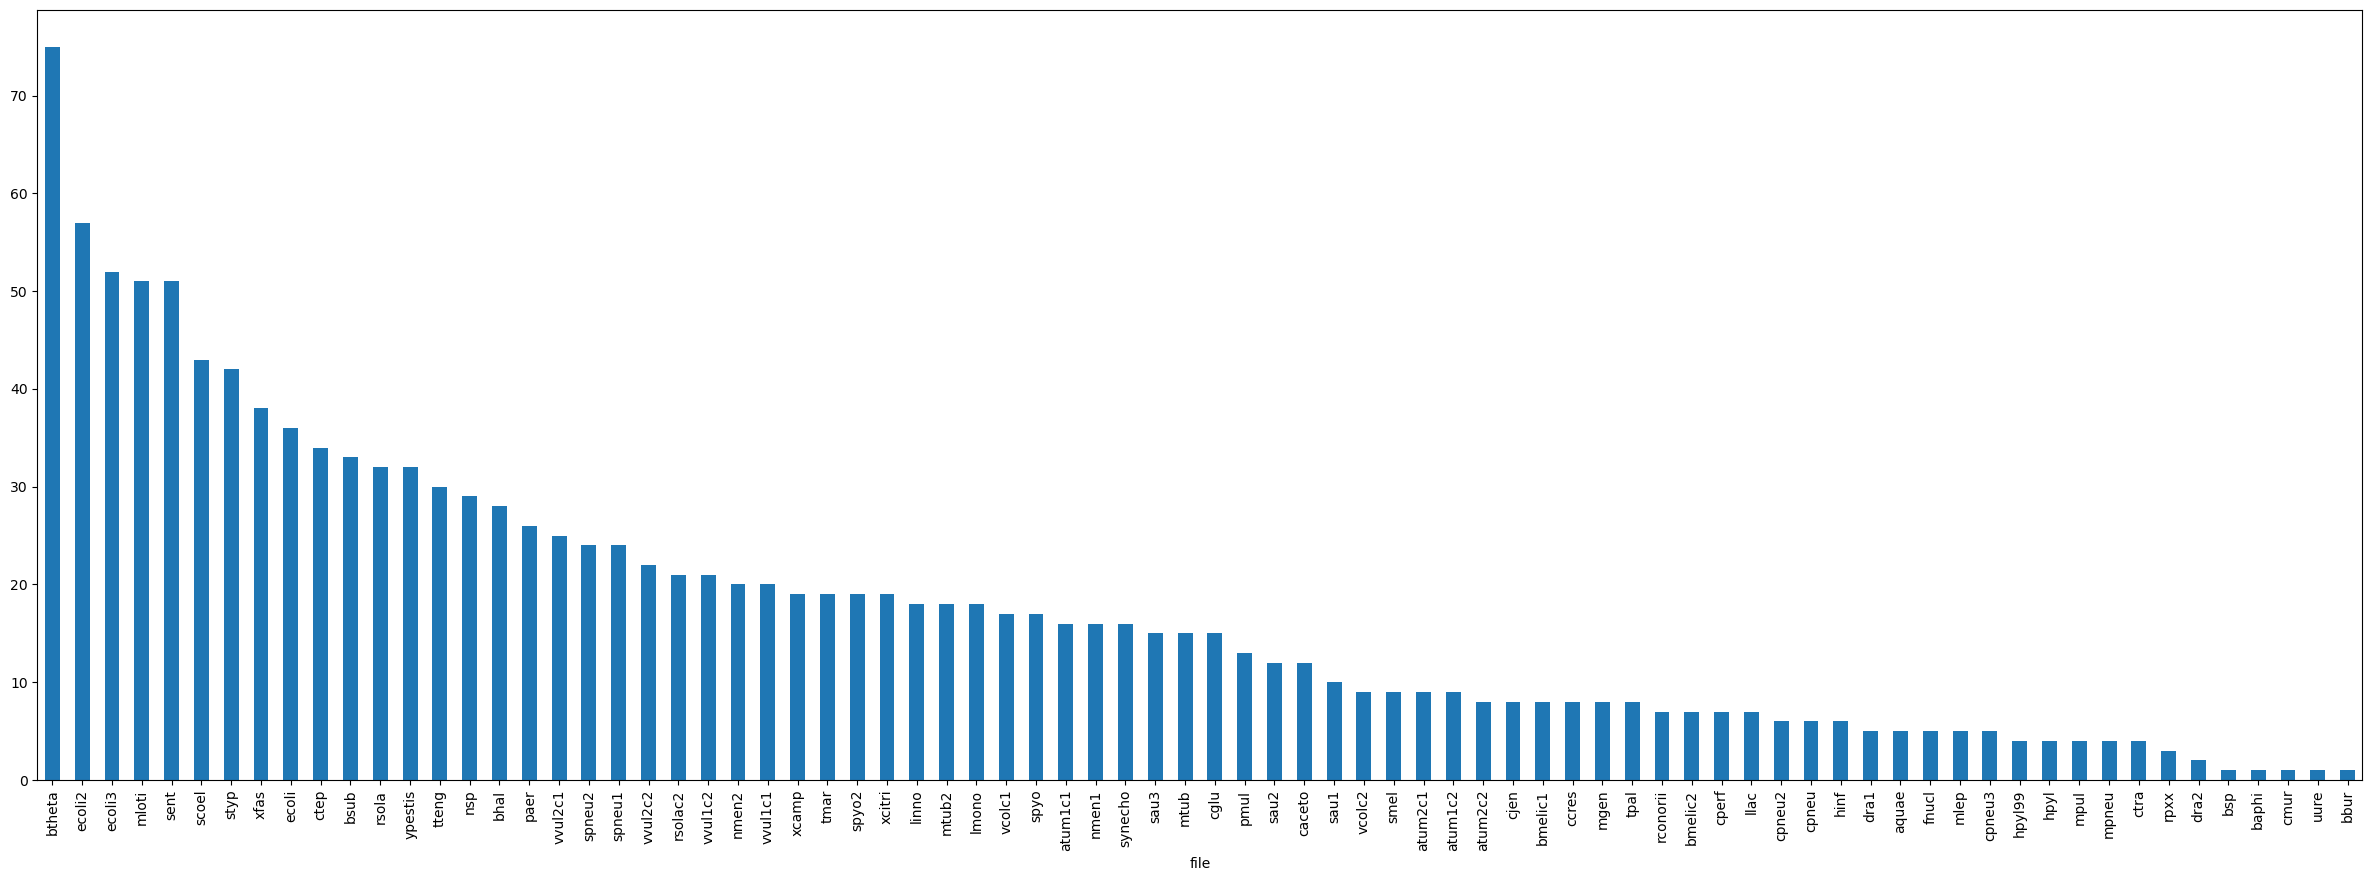

In [151]:
table_of_extraneous_regions['file'].value_counts().plot(kind='bar', figsize=(30,10))

# Extracting all of the functions in extraneous strip

In [52]:
table_of_extraneous_regions = pd.read_csv('list_of_extraneous_regions.csv', sep=';')

In [53]:
table_of_extraneous_regions

,file,GC,ngt,Init. pos.,Fin. pos
0,aquae,-,5.0,104858.0,108998.0
1,aquae,-,15.0,248932.0,264490.0
2,aquae,+,8.0,322201.0,329528.0
3,aquae,-,17.0,339619.0,356830.0
4,aquae,-,6.0,714928.0,720652.0
...,...,...,...,...,...
1350,dra1,-,11.0,536164.0,550901.0
1351,dra1,-,11.0,671909.0,681391.0
1352,dra1,-,6.0,1235983.0,1242036.0
1353,dra2,-,17.0,33474.0,52485.0


In [55]:
table_of_extraneous_regions[table_of_extraneous_regions.isnull().values]['file'].unique()

array(['cmur', 'bsp'], dtype=object)

In [54]:
selected_columns = [
    'Coordinates',
    'Synonym',
    'Gene name',
    'HGT',
    'Function',
    'COG'
    ]

In [168]:
extraneous_functions = pd.DataFrame(columns=['genome'] + selected_columns)


for i in table_of_extraneous_regions['file'].unique():
    if i in table_of_extraneous_regions[table_of_extraneous_regions.isnull().values]['file'].unique():
        pass
    else:
        extraneous_strips_in_genome = table_of_extraneous_regions[table_of_extraneous_regions['file'] == i].reset_index(drop=True)
        
        # vvul2c1 has some nan
        genome = pd.read_csv(f'data/HGTDB/temp_data/{i}.tsv', sep='\t', na_values=None, usecols=selected_columns).dropna()
        start_coord = []
        end_coord = []
        for coord in genome['Coordinates']:
            split = coord.split('..')
            start_coord.append(split[0])
            end_coord.append(split[1])
        
        genome['start_coord'] = start_coord
        genome['end_coord'] = end_coord
        
        
        

        for index in range(len(extraneous_strips_in_genome)):
            init_pos = str(int(extraneous_strips_in_genome.loc[index,'Init. pos.']))
            total_genes = int(extraneous_strips_in_genome.loc[index,'ngt'])
            
            start_index = genome[genome['start_coord'] == init_pos].index
            
            if len(start_index) > 1:
                print(f'Something wrong in {i}')
            elif len(start_index) == 0:
                print(f'Cannot find strip in {i} that starts with {init_pos}')
            else:
                for gene_count in range(total_genes):
                    curr_loc = len(extraneous_functions)+1
                    curr_gene = start_index[0]+gene_count
                    
                    extraneous_functions.loc[curr_loc, 'genome'] = i
                    extraneous_functions.loc[curr_loc, 'Coordinates'] = genome.loc[curr_gene,'Coordinates']
                    extraneous_functions.loc[curr_loc, 'Synonym'] = genome.loc[curr_gene,'Synonym']
                    extraneous_functions.loc[curr_loc, 'Gene name'] = genome.loc[curr_gene,'Gene name']
                    extraneous_functions.loc[curr_loc, 'HGT'] = genome.loc[curr_gene,'HGT']
                    extraneous_functions.loc[curr_loc, 'Function'] = genome.loc[curr_gene,'Function']
                    extraneous_functions.loc[curr_loc, 'COG'] = genome.loc[curr_gene,'COG']

            
    
        
        

Cannot find strip in scoel that starts with 3590146
Cannot find strip in scoel that starts with 3608420
Cannot find strip in scoel that starts with 3826473
Cannot find strip in scoel that starts with 3843523
Cannot find strip in scoel that starts with 3872165
Cannot find strip in scoel that starts with 3896197
Cannot find strip in scoel that starts with 4069088
Cannot find strip in scoel that starts with 4109279
Cannot find strip in scoel that starts with 4158580
Cannot find strip in scoel that starts with 4321756
Cannot find strip in scoel that starts with 4384451
Cannot find strip in scoel that starts with 4451653
Cannot find strip in scoel that starts with 4754366
Cannot find strip in scoel that starts with 4933782
Cannot find strip in scoel that starts with 4957302
Cannot find strip in scoel that starts with 5120514
Cannot find strip in scoel that starts with 5796053
Cannot find strip in scoel that starts with 6107817
Cannot find strip in scoel that starts with 6137156
Cannot find 

In [170]:
extraneous_functions.to_csv('collection_of_extraneous_strip.csv',index=False)

summary:

- While collecting the functions of genes define in the extraneous strips; important findings are:
    - Some specified strips does not actually exist.. or rather not found in the data provided
        - eg: 
            - scoel that starts with 3590146
            - ecoli that starts with 2100968
            - hinf that starts with 1476599
    - two, i.e. cmur and bsp does not have any extraneous strip at all!

# Exploring Word frequencies

reference:

- https://deepnote.com/@code-along-tutorials/Natural-Language-Processing-in-Python-Exploring-Word-Frequencies-with-NLTK-47ec085a-7a46-4f5d-89a1-e08be7d164c5

In [1]:
#Import the relevant libraries
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import pandas as pd

In [2]:
# one time only (?)
nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /homes/adjie.salman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /homes/adjie.salman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# load default english stop words
stopwords_list = stopwords.words("english")

In [4]:
extraneous_functions = pd.read_csv('collection_of_extraneous_strip.csv')

In [5]:
# collect words found in the list of functions
words = []

for i in range(len(extraneous_functions)):
    function = extraneous_functions.loc[i,'Function']
    words = words +  word_tokenize(function)
    
words_no_punc = []
# remove punctuations that are found in list of words
for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())
        

clean_words = []
# take out stop words
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

In [6]:
fdist = FreqDist(clean_words)
fdist.most_common(20)

[('protein', 8702),
 ('hypothetical', 5233),
 ('putative', 1910),
 ('conserved', 1294),
 ('unknown', 744),
 ('similar', 519),
 ('regulator', 437),
 ('probable', 357),
 ('transposase', 353),
 ('membrane', 347),
 ('subunit', 319),
 ('transporter', 311),
 ('predicted', 304),
 ('system', 298),
 ('transcriptional', 297),
 ('abc', 275),
 ('family', 270),
 ('component', 262),
 ('transport', 242),
 ('prophage', 227)]

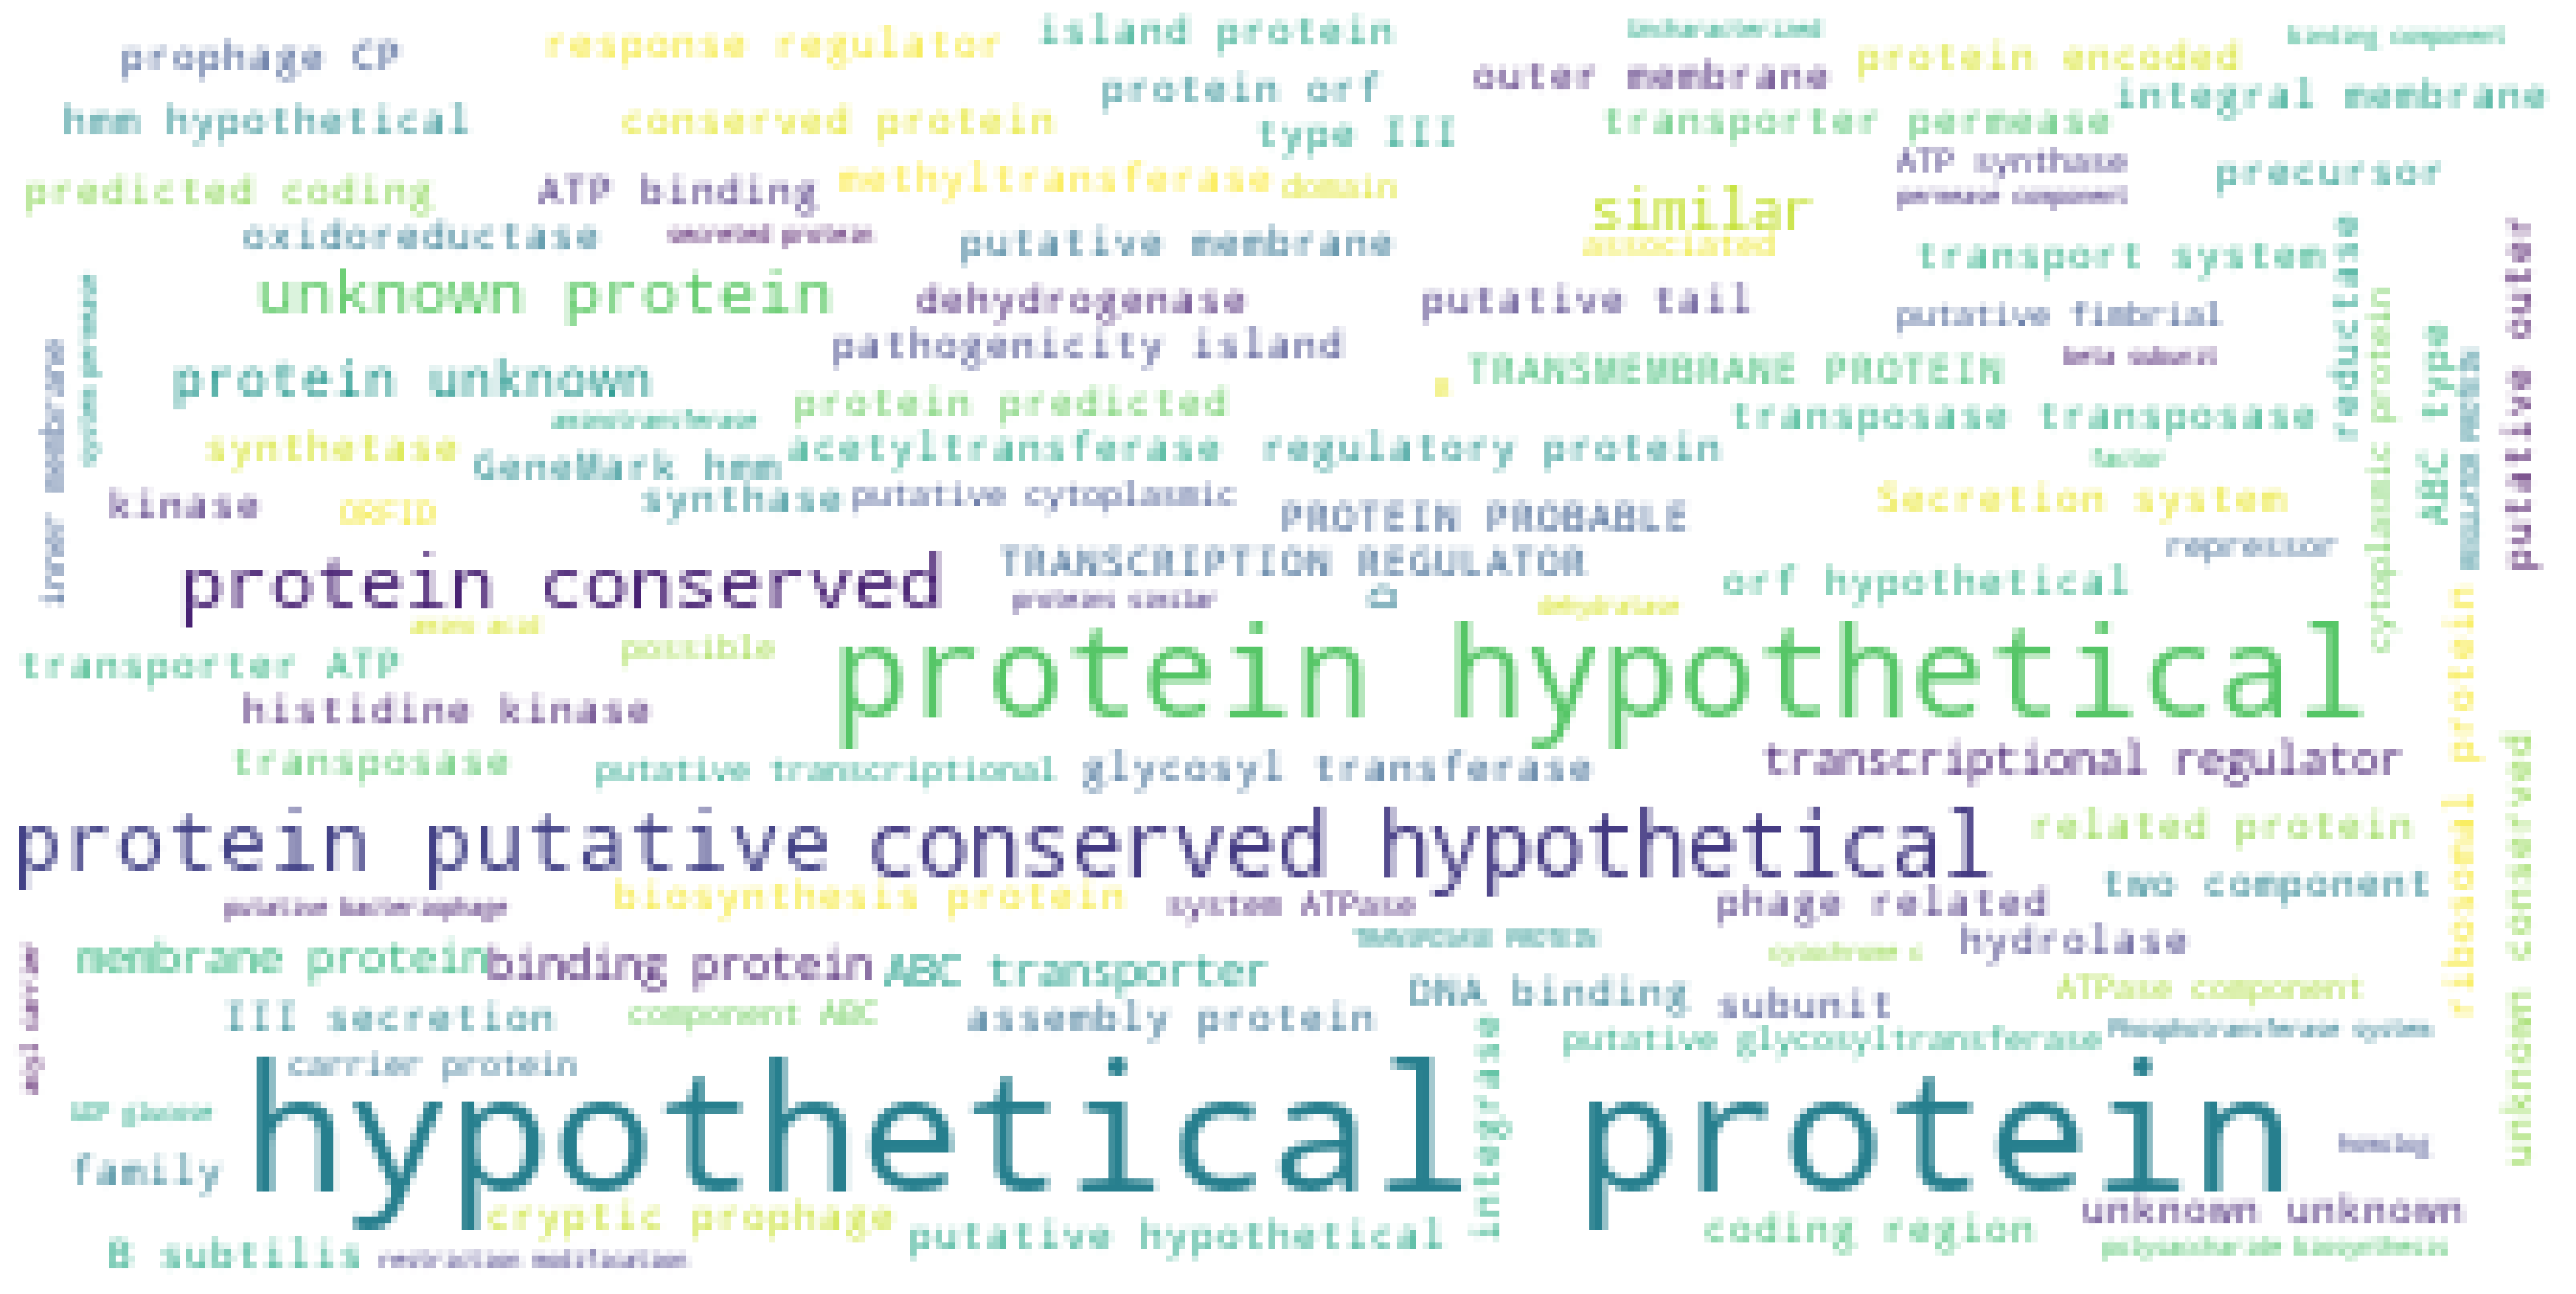

In [7]:
#Convert word list to a single string
clean_words_string = " ".join(words)

#generating the wordcloud
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

#plot the wordcloud
plt.figure(figsize = (50, 50))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()

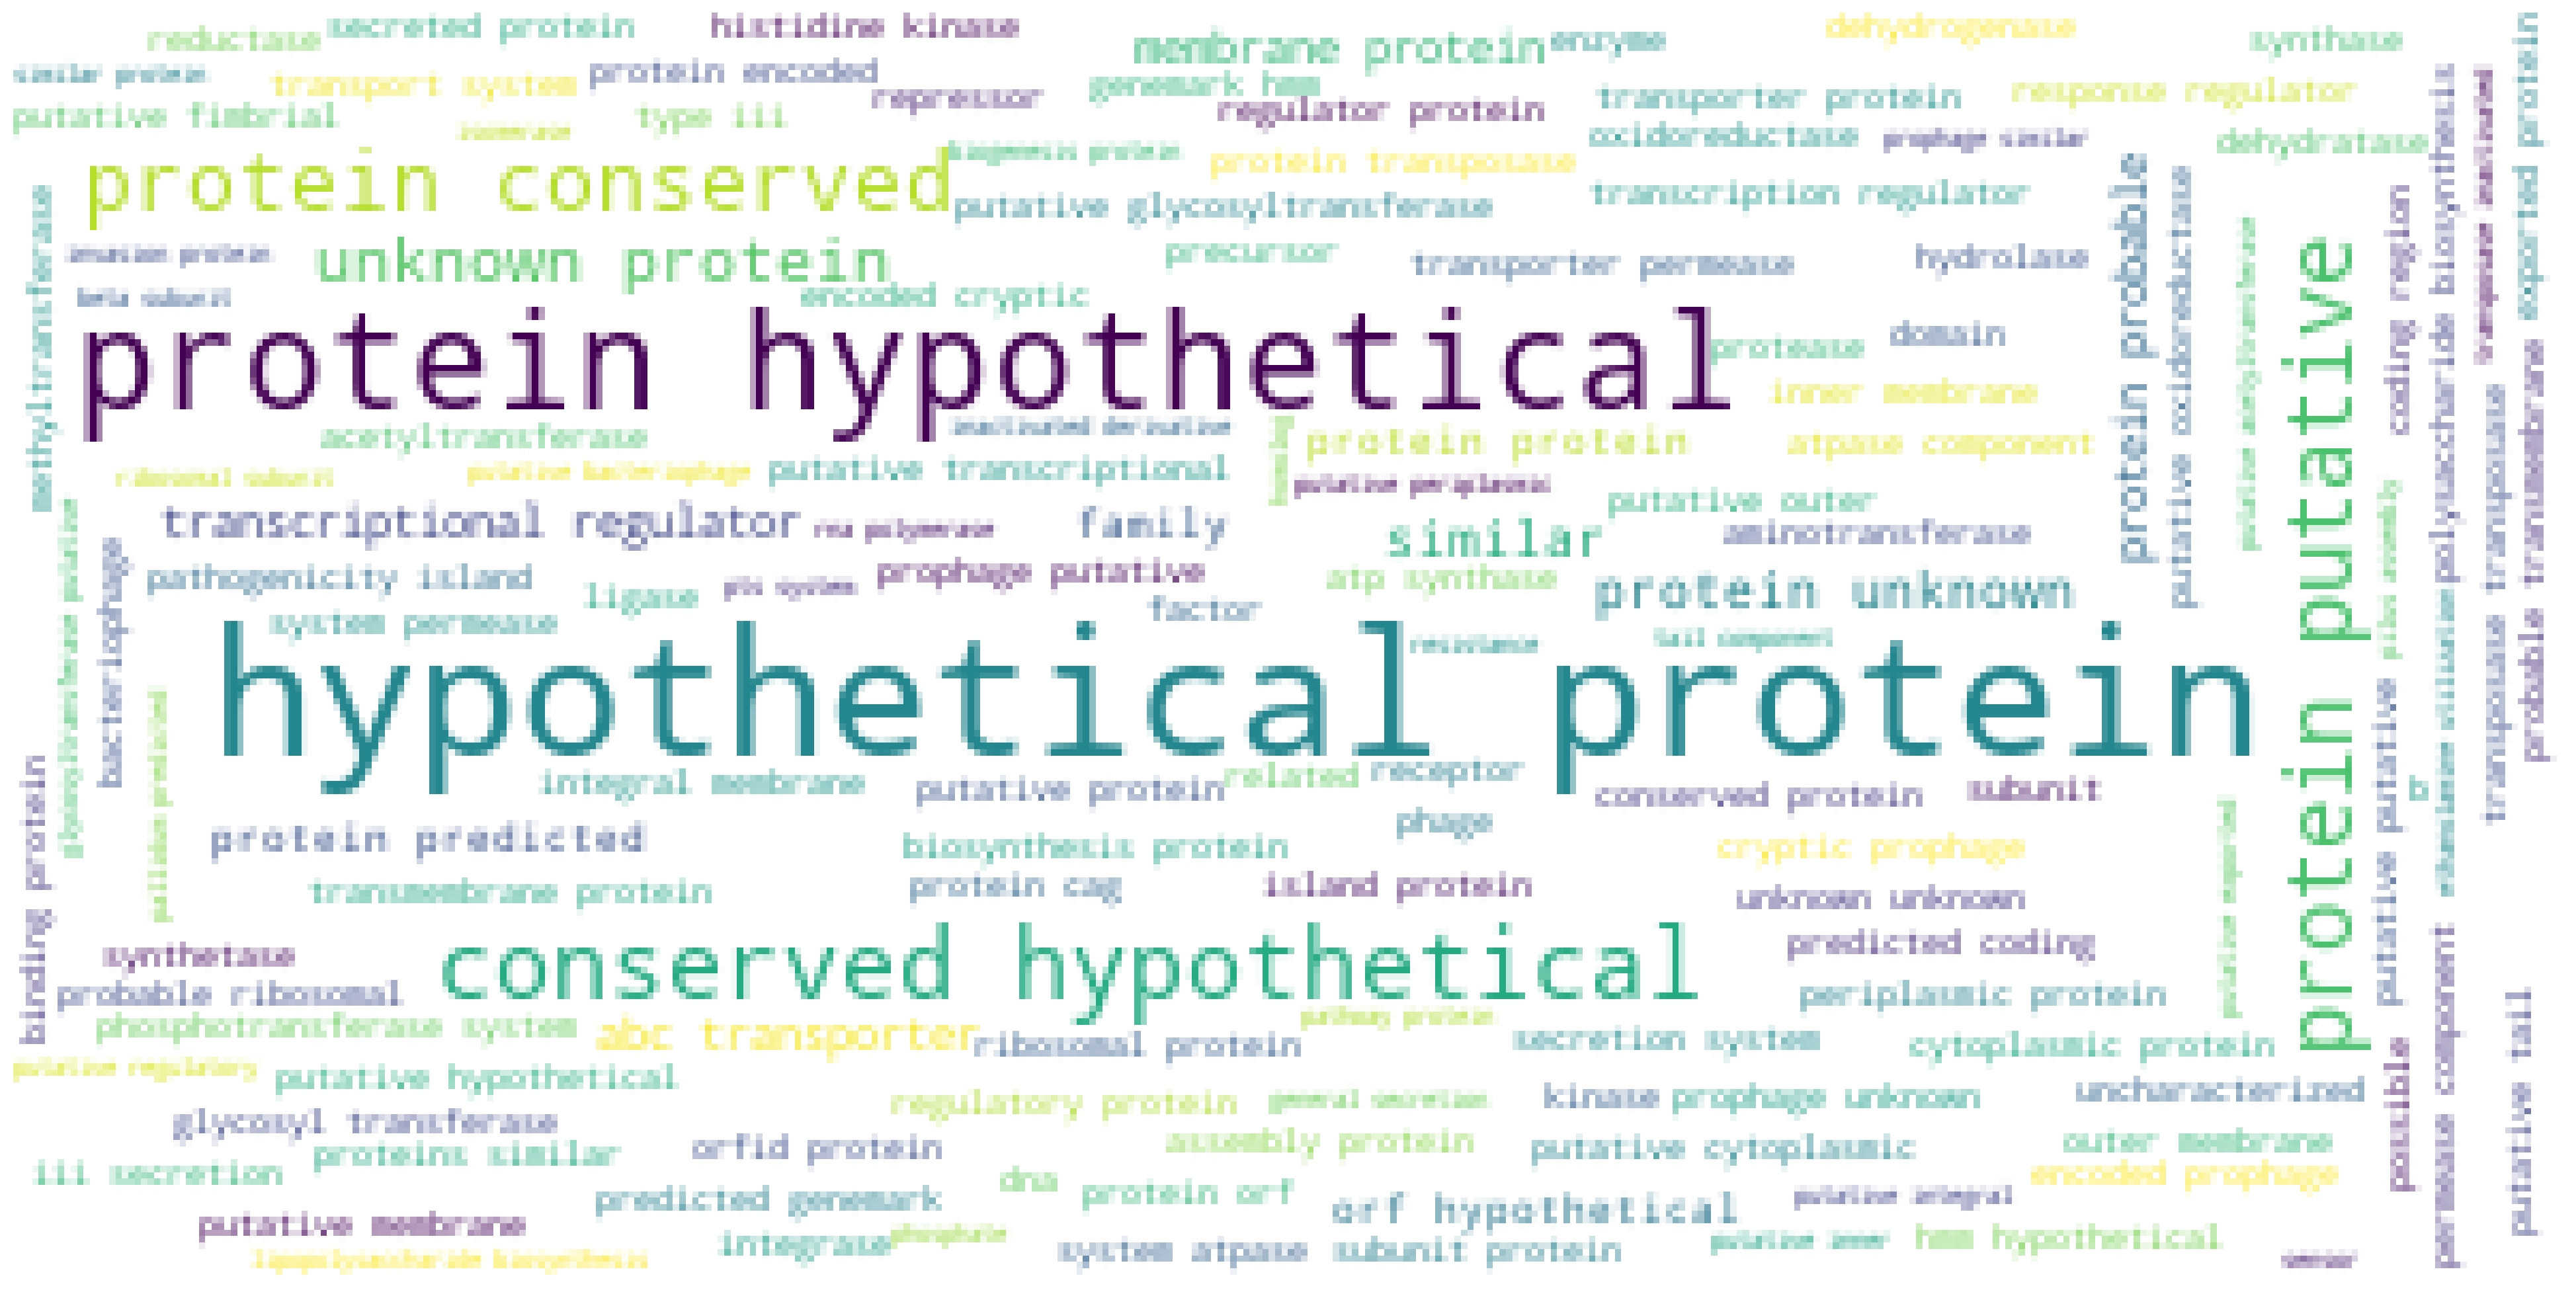

In [8]:
#Convert word list to a single string
clean_words_string = " ".join(clean_words)

#generating the wordcloud
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

#plot the wordcloud
plt.figure(figsize = (50, 50))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()

Summary:

- Logic: find the most frequent word to tag as hgt:
    - top 5s are
        - Protein (8702)
        - Hypothetical (5233)
        - putatitve (1910)
        - conserved (1294)
        - unknown (744)
- It feels like the combination of hypothetical protein is the most common word found in list of extraneous strip
    - based on the word cloud
- because it does not make sense to create a rule that tags gene as hgt when function has protein..
    - if the rule is anything that has both protein and hypothetical then we can get better result (assumption)
    - based on eye observation. Frequent words are
        - Hypothetical + protein
        - putative + protein
        - conserved + protein

# Using hypothetical + protein to tag as HGT

## Finding out the effect of the filter on genomes without extraneous strip

- there are some genomes without extraneous strip 'cmur' and 'bsp'
- An algorithm that determines a gene is hgt or not has already been found but without taking the sliding windows into consideration


below is taken from my 11_gene_windows.ipynb 

Found under CORRECT EXTRANEOUS and the function there is called check_extraneous_gc_3 and edited a little bit

In [2]:
def check_extraneous_gc(genome):
    extraneous = []
    for idx,tag in enumerate(genome['Synonym']):
        if genome.loc[idx,'Length'] >= 300:
            if genome.loc[idx,'SimGC'] >= 1 and genome.loc[idx, 'SimMah'] >= 1:
                if genome[genome['Synonym'] == tag]['Dev.AA'].values == '                     ':
                    if 'ribosomal' not in genome.loc[idx, 'Function']:
                        extraneous.append('H')
                    else:
                        extraneous.append(None)
                else:
                    extraneous.append(None)
            else:
                extraneous.append(None)
        else:
            extraneous.append(None)
    return extraneous

In [59]:
def compare_actual_and_pred(genome):
    total_actual_HGTs = 0
    total_predicted_HGTs = 0
    
    actual_HGTs = []
    predicted_HGTs = []
    for i in range(len(genome)):
        
        if genome.loc[i,'HGT'] == 'H':
            actual_HGTs.append((genome.loc[i,'Synonym'],genome.loc[i,'Function']))
            total_actual_HGTs+=1
            
        if genome.loc[i,'extraneous'] == 'H':
            predicted_HGTs.append((genome.loc[i,'Synonym'],genome.loc[i,'Function']))
            total_predicted_HGTs+=1
            
    print(f'Total actual HGTs {total_actual_HGTs}')
    print(f'Total predicted HGTs {total_predicted_HGTs}')
    
    
    print('Actuals:')
    for synonym,function in actual_HGTs:
        print(f'{synonym} {function}')
        
    
    print('Preds:')
    for synonym,function in predicted_HGTs:
        print(f'{synonym} {function}')

In [60]:
cmur_HGTDB = pd.read_csv('data/HGTDB/temp_data/cmur.tsv', sep='\t', na_values=None)
bsp_HGTDB = pd.read_csv('data/HGTDB/temp_data/bsp.tsv', sep='\t', na_values=None)
cmur_HGTDB['extraneous'] = check_extraneous_gc(cmur_HGTDB)
bsp_HGTDB['extraneous'] = check_extraneous_gc(bsp_HGTDB)

In [61]:
compare_actual_and_pred(cmur_HGTDB)

Total actual HGTs 12
Total predicted HGTs 12
Actuals:
TC0115 hypothetical protein
TC0201 conserved hypothetical protein
TC0219 N utilization substance protein B, putative
TC0286 conserved hypothetical protein
TC0469 hypothetical protein
TC0498 hypothetical protein
TC0520 hypothetical protein
TC0751 conserved hypothetical protein
TC0770 conserved hypothetical protein
TC0857 conserved hypothetical protein
TC0886 ExbD/TolR family protein
TC0891 conserved hypothetical protein
Preds:
TC0115 hypothetical protein
TC0201 conserved hypothetical protein
TC0219 N utilization substance protein B, putative
TC0286 conserved hypothetical protein
TC0469 hypothetical protein
TC0498 hypothetical protein
TC0520 hypothetical protein
TC0751 conserved hypothetical protein
TC0770 conserved hypothetical protein
TC0857 conserved hypothetical protein
TC0886 ExbD/TolR family protein
TC0891 conserved hypothetical protein


In [62]:
compare_actual_and_pred(bsp_HGTDB)

Total actual HGTs 0
Total predicted HGTs 0
Actuals:
Preds:


## adding hypothetical, putative, conserved protein

In [63]:
def check_extraneous_gc_new_tag(genome):
    extraneous = []
    for idx,tag in enumerate(genome['Synonym']):
        if genome.loc[idx,'Length'] >= 300:
            if genome.loc[idx,'SimGC'] >= 1 and genome.loc[idx, 'SimMah'] >= 1:
                if genome[genome['Synonym'] == tag]['Dev.AA'].values == '                     ':
                    words = word_tokenize(genome.loc[idx, 'Function'])
                    words = [word.lower() for word in words]
                    #print(genome.loc[idx, 'Function'].lower())
                    if 'hypothetical' in words:
                        #print('hypothetical')
                        extraneous.append('H')
                    elif 'conserved' in words:
                        #print('conserved')
                        extraneous.append('H')
                    elif 'putative' in words:
                        #print('putative')
                        extraneous.append('H')
                    elif 'ribosomal' not in genome.loc[idx, 'Function']:
                        #print('ribosomal')
                        extraneous.append('H')
                    else:
                        extraneous.append(None)
                else:
                    extraneous.append(None)
            else:
                extraneous.append(None)
        else:
            extraneous.append(None)
    return extraneous

In [64]:
cmur_HGTDB = pd.read_csv('data/HGTDB/temp_data/cmur.tsv', sep='\t', na_values=None)
bsp_HGTDB = pd.read_csv('data/HGTDB/temp_data/bsp.tsv', sep='\t', na_values=None)
cmur_HGTDB['extraneous'] = check_extraneous_gc_new_tag(cmur_HGTDB)
bsp_HGTDB['extraneous'] = check_extraneous_gc_new_tag(bsp_HGTDB)

In [65]:
compare_actual_and_pred(cmur_HGTDB)

Total actual HGTs 12
Total predicted HGTs 12
Actuals:
TC0115 hypothetical protein
TC0201 conserved hypothetical protein
TC0219 N utilization substance protein B, putative
TC0286 conserved hypothetical protein
TC0469 hypothetical protein
TC0498 hypothetical protein
TC0520 hypothetical protein
TC0751 conserved hypothetical protein
TC0770 conserved hypothetical protein
TC0857 conserved hypothetical protein
TC0886 ExbD/TolR family protein
TC0891 conserved hypothetical protein
Preds:
TC0115 hypothetical protein
TC0201 conserved hypothetical protein
TC0219 N utilization substance protein B, putative
TC0286 conserved hypothetical protein
TC0469 hypothetical protein
TC0498 hypothetical protein
TC0520 hypothetical protein
TC0751 conserved hypothetical protein
TC0770 conserved hypothetical protein
TC0857 conserved hypothetical protein
TC0886 ExbD/TolR family protein
TC0891 conserved hypothetical protein


In [66]:
compare_actual_and_pred(bsp_HGTDB)

Total actual HGTs 0
Total predicted HGTs 0
Actuals:
Preds:


Summary:
- The code is implemented correctly (hopefully)
- The accuracy is for both 100%!!!!!! actually dont change much!!!

## Finding out the effect of the filter on genomes WITH extraneous strip

fnucl will be used as an example for arbitrary reason

### fnucl

In [73]:
fnucl_HGTDB = pd.read_csv('data/HGTDB/temp_data/fnucl.tsv', sep='\t', na_values=None)
fnucl_HGTDB['extraneous'] = check_extraneous_gc_new_tag(fnucl_HGTDB)

In [74]:
compare_actual_and_pred(fnucl_HGTDB)

Total actual HGTs 40
Total predicted HGTs 16
Actuals:
FN1520 UDP-N-acetylglucosamine 1-carboxyvinyltransferase
FN1521 Dipeptide transport system permease protein dppB
FN1522 Dipeptide transport system permease protein dppC
FN1524 Dipeptide transport ATP-binding protein dppD
FN1525 Dipeptide transport ATP-binding protein dppF
FN1536 (S)-2-hydroxy-acid oxidase chain D
FN1537 Arsenical pump-driving ATPase
FN1539 Iron-sulfur cluster-binding protein
FN1540 Iron-sulfur cluster-binding protein
FN1541 Heptaprenyl diphosphate synthase component II
FN1915 Anti-sigma B factor
FN1943 Tryptophanase
FN0038 unknown
FN0202 Glutaconate CoA-transferase subunit A
FN0205 Sodium/glutamate symport carrier protein
FN0206 Activator of (R)-2-hydroxyglutaryl-CoA dehydratase
FN0207 (R)-2-hydroxyglutaryl-CoA dehydratase alpha-subunit
FN0208 (R)-2-hydroxyglutaryl-CoA dehydratase beta-subunit
FN0213 N-acylneuraminate-9-phosphatase
FN0429 unknown
FN0439 Lactam utilization protein LAMB
FN0548 Regulatory protein recX


In [75]:
fnucl_HGTDB = pd.read_csv('data/HGTDB/temp_data/fnucl.tsv', sep='\t', na_values=None)
fnucl_HGTDB['extraneous'] = check_extraneous_gc(fnucl_HGTDB)

In [76]:
compare_actual_and_pred(fnucl_HGTDB)

Total actual HGTs 40
Total predicted HGTs 16
Actuals:
FN1520 UDP-N-acetylglucosamine 1-carboxyvinyltransferase
FN1521 Dipeptide transport system permease protein dppB
FN1522 Dipeptide transport system permease protein dppC
FN1524 Dipeptide transport ATP-binding protein dppD
FN1525 Dipeptide transport ATP-binding protein dppF
FN1536 (S)-2-hydroxy-acid oxidase chain D
FN1537 Arsenical pump-driving ATPase
FN1539 Iron-sulfur cluster-binding protein
FN1540 Iron-sulfur cluster-binding protein
FN1541 Heptaprenyl diphosphate synthase component II
FN1915 Anti-sigma B factor
FN1943 Tryptophanase
FN0038 unknown
FN0202 Glutaconate CoA-transferase subunit A
FN0205 Sodium/glutamate symport carrier protein
FN0206 Activator of (R)-2-hydroxyglutaryl-CoA dehydratase
FN0207 (R)-2-hydroxyglutaryl-CoA dehydratase alpha-subunit
FN0208 (R)-2-hydroxyglutaryl-CoA dehydratase beta-subunit
FN0213 N-acylneuraminate-9-phosphatase
FN0429 unknown
FN0439 Lactam utilization protein LAMB
FN0548 Regulatory protein recX


### cmur

In [79]:
mlep_HGTDB = pd.read_csv('data/HGTDB/temp_data/mlep.tsv', sep='\t', na_values=None)
mlep_HGTDB['extraneous'] = check_extraneous_gc_new_tag(mlep_HGTDB)

In [80]:
compare_actual_and_pred(mlep_HGTDB)

Total actual HGTs 73
Total predicted HGTs 31
Actuals:
ML0006 putative DNA gyrase subunit A
ML0007 putative membrane protein
ML0008 hypothetical protein
ML0009 hypothetical protein
ML0011 putative peptidyl-prolyl cis-trans isomerase
ML0012 putative membrane protein
ML0015 putative p-aminobenzoate synthase glutamine amidotransferase
ML0284 conserved hypothetical protein
ML0291 hypothetical protein
ML0397 putative transporter protein
ML0398 putative D-ribose-binding protein
ML0405 conserved hypothetical protein
ML0406 conserved hypothetical protein
ML0407 conserved hypothetical protein
ML0410 putative PE-family protein
ML0411 serine-rich antigen
ML0550 putative marR-family transcriptional regulator
ML0678 hypothetical protein
ML0926 hypothetical protein
ML0927 hypothetical protein
ML0928 hypothetical protein
ML0939 hypothetical protein
ML0946 conserved hypothetical protein
ML0947 hypothetical protein
ML0949 hypothetical protein
ML0950 hypothetical protein
ML0957 hypothetical protein
ML095

In [81]:
mlep_HGTDB = pd.read_csv('data/HGTDB/temp_data/mlep.tsv', sep='\t', na_values=None)
mlep_HGTDB['extraneous'] = check_extraneous_gc(mlep_HGTDB)

In [82]:
compare_actual_and_pred(mlep_HGTDB)

Total actual HGTs 73
Total predicted HGTs 31
Actuals:
ML0006 putative DNA gyrase subunit A
ML0007 putative membrane protein
ML0008 hypothetical protein
ML0009 hypothetical protein
ML0011 putative peptidyl-prolyl cis-trans isomerase
ML0012 putative membrane protein
ML0015 putative p-aminobenzoate synthase glutamine amidotransferase
ML0284 conserved hypothetical protein
ML0291 hypothetical protein
ML0397 putative transporter protein
ML0398 putative D-ribose-binding protein
ML0405 conserved hypothetical protein
ML0406 conserved hypothetical protein
ML0407 conserved hypothetical protein
ML0410 putative PE-family protein
ML0411 serine-rich antigen
ML0550 putative marR-family transcriptional regulator
ML0678 hypothetical protein
ML0926 hypothetical protein
ML0927 hypothetical protein
ML0928 hypothetical protein
ML0939 hypothetical protein
ML0946 conserved hypothetical protein
ML0947 hypothetical protein
ML0949 hypothetical protein
ML0950 hypothetical protein
ML0957 hypothetical protein
ML095

summary:

It seems that adding additional tags to the hgt tagger (based on gc content, aa and codon) seems to not function....

implmentation seems correct but a proposed understanding is this:
- genes that deviates from the norm are usually hypothetical, conserved or putative protein or genes that is not ribosomal
- the addition of the tag does not help at all
- a greed approach for the additional tag should be tried

### greedy tagging

basically takes the original gc but run through again to tag any genes with hypothetical, conserved or putative

In [103]:
def check_extraneous_gc_greedy(genome):
    extraneous = []
    # normal first run
    for idx,tag in enumerate(genome['Synonym']):
        if genome.loc[idx,'Length'] >= 300:
            if genome.loc[idx,'SimGC'] >= 1 and genome.loc[idx, 'SimMah'] >= 1:
                if genome[genome['Synonym'] == tag]['Dev.AA'].values == '                     ':
                    if 'ribosomal' not in genome.loc[idx, 'Function']:
                        extraneous.append('H')
                    else:
                        extraneous.append(None)
                else:
                    extraneous.append(None)
            else:
                extraneous.append(None)
        else:
            extraneous.append(None)
            
    # greedy second run
    for idx,tag in enumerate(genome['Synonym']):
        # still filter for bp more than 300
        if genome.loc[idx,'Length'] >= 300:
            if genome.loc[idx,'SimGC'] >= 1 and genome.loc[idx, 'SimMah'] >= 1:
                words = word_tokenize(genome.loc[idx, 'Function'])
                words = [word.lower() for word in words]
                #print(genome.loc[idx, 'Function'].lower())
                if 'hypothetical' in words:
                    #print('hypothetical')
                    extraneous[idx] = 'H'
                elif 'conserved' in words:
                    #print('conserved')
                    extraneous[idx] = 'H'
                elif 'putative' in words:
                    #print('putative')
                    extraneous[idx] = 'H'
                else:
                    pass
        else:
            pass
    
    
    return extraneous

In [104]:
cmur_HGTDB = pd.read_csv('data/HGTDB/temp_data/cmur.tsv', sep='\t', na_values=None)
bsp_HGTDB = pd.read_csv('data/HGTDB/temp_data/bsp.tsv', sep='\t', na_values=None)
cmur_HGTDB['extraneous'] = check_extraneous_gc_greedy(cmur_HGTDB)
bsp_HGTDB['extraneous'] = check_extraneous_gc_greedy(bsp_HGTDB)

In [105]:
compare_actual_and_pred(cmur_HGTDB)

Total actual HGTs 12
Total predicted HGTs 27
Actuals:
TC0115 hypothetical protein
TC0201 conserved hypothetical protein
TC0219 N utilization substance protein B, putative
TC0286 conserved hypothetical protein
TC0469 hypothetical protein
TC0498 hypothetical protein
TC0520 hypothetical protein
TC0751 conserved hypothetical protein
TC0770 conserved hypothetical protein
TC0857 conserved hypothetical protein
TC0886 ExbD/TolR family protein
TC0891 conserved hypothetical protein
Preds:
TC0011 hypothetical protein
TC0026 hypothetical protein
TC0034 conserved hypothetical protein
TC0089 conserved hypothetical protein
TC0114 hypothetical protein
TC0115 hypothetical protein
TC0201 conserved hypothetical protein
TC0219 N utilization substance protein B, putative
TC0259 hypothetical protein
TC0286 conserved hypothetical protein
TC0323 conserved hypothetical protein
TC0352 hypothetical protein
TC0392 hypothetical protein
TC0448 conserved hypothetical protein
TC0469 hypothetical protein
TC0484 conser

In [106]:
compare_actual_and_pred(bsp_HGTDB)

Total actual HGTs 0
Total predicted HGTs 0
Actuals:
Preds:


In [107]:
mlep_HGTDB = pd.read_csv('data/HGTDB/temp_data/mlep.tsv', sep='\t', na_values=None)
mlep_HGTDB['extraneous'] = check_extraneous_gc_greedy(mlep_HGTDB)

In [108]:
compare_actual_and_pred(mlep_HGTDB)

Total actual HGTs 73
Total predicted HGTs 76
Actuals:
ML0006 putative DNA gyrase subunit A
ML0007 putative membrane protein
ML0008 hypothetical protein
ML0009 hypothetical protein
ML0011 putative peptidyl-prolyl cis-trans isomerase
ML0012 putative membrane protein
ML0015 putative p-aminobenzoate synthase glutamine amidotransferase
ML0284 conserved hypothetical protein
ML0291 hypothetical protein
ML0397 putative transporter protein
ML0398 putative D-ribose-binding protein
ML0405 conserved hypothetical protein
ML0406 conserved hypothetical protein
ML0407 conserved hypothetical protein
ML0410 putative PE-family protein
ML0411 serine-rich antigen
ML0550 putative marR-family transcriptional regulator
ML0678 hypothetical protein
ML0926 hypothetical protein
ML0927 hypothetical protein
ML0928 hypothetical protein
ML0939 hypothetical protein
ML0946 conserved hypothetical protein
ML0947 hypothetical protein
ML0949 hypothetical protein
ML0950 hypothetical protein
ML0957 hypothetical protein
ML095

In [111]:
bsub_HGTDB = pd.read_csv('data/HGTDB/temp_data/bsub.tsv', sep='\t', na_values=None)
bsub_HGTDB['extraneous'] = check_extraneous_gc_greedy(bsub_HGTDB)

In [112]:
compare_actual_and_pred(bsub_HGTDB)

Total actual HGTs 552
Total predicted HGTs 123
Actuals:
Bsu0030 yaaR
Bsu0061 yabQ
Bsu0083 transcriptional regulator
Bsu0179 ybbU
Bsu0180 DNA-3-methyladenine glycosylase
Bsu0181 methylphosphotriester-DNA alkyltransferase and transcriptional regulator (AraC/XylS family)
Bsu0183 NADH dehydrogenase (subunit 5)
Bsu0184 ybcC
Bsu0186 ybcF
Bsu0187 ybcH
Bsu0188 ybcI
Bsu0191 ybcO
Bsu0192 ybcP
Bsu0194 ybcS
Bsu0195 ybcT
Bsu0197 similar to ABC transporter (permease)
Bsu0198 ybdD
Bsu0199 similar to hypothetical proteins
Bsu0200 ybdG
Bsu0246 alternate gene name: yzgB~similar to two-component response regulator [YcbA]
Bsu0247 similar to 5-dehydro-4-deoxyglucarate dehydratase
Bsu0248 similar to aldehyde dehydrogenase
Bsu0250 similar to glucarate dehydratase
Bsu0251 similar to transcriptional regulator (GntR family)
Bsu0252 similar to hypothetical proteins
Bsu0253 similar to viomycin phosphotransferase
Bsu0328 similar to thioredoxin reductase
Bsu0329 uroporphyrin-III C-methyltransferase
Bsu0330 assimila